In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/usa-airport-dataset/Airports2.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [3]:
df = pd.read_csv('../input/usa-airport-dataset/Airports2.csv')

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606798,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",281,969,51,119,2009-02-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606799,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",245,1026,54,119,2009-11-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606800,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",363,1273,67,119,2009-08-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606801,CGI,TBN,"Cape Girardeau, MO","Fort Leonard Wood, MO",2,19,1,146,2009-08-01,93712,46457,37.225300,-89.570801,37.741600,-92.140701


In [6]:
data = df

In [7]:
label = data['Distance']/data['Flights']

In [8]:
label

0          254.000000
1            4.681818
2            5.421053
3           25.750000
4          156.000000
              ...    
3606798      2.333333
3606799      2.203704
3606800      1.776119
3606801    146.000000
3606802    135.000000
Length: 3606803, dtype: float64

In [9]:
type(label)

pandas.core.series.Series

In [10]:
label = pd.DataFrame(label)

In [11]:
data['profit'] = label

In [12]:
data

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,profit
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN,254.000000
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001,4.681818
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001,5.421053
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001,25.750000
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001,156.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606798,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",281,969,51,119,2009-02-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701,2.333333
3606799,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",245,1026,54,119,2009-11-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701,2.203704
3606800,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",363,1273,67,119,2009-08-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701,1.776119
3606801,CGI,TBN,"Cape Girardeau, MO","Fort Leonard Wood, MO",2,19,1,146,2009-08-01,93712,46457,37.225300,-89.570801,37.741600,-92.140701,146.000000


In [13]:
len(data)

3606803

In [14]:
data2 = data.dropna()

In [15]:
len(data)

3606803

In [16]:
len(data2)

3593852

In [17]:
lable = data2['profit']

In [18]:
data2['label'] = lable

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
data2

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,profit,label
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001,4.681818,4.681818
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001,5.421053,5.421053
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001,25.750000,25.750000
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001,156.000000,156.000000
5,MFR,RDM,"Medford, OR","Bend, OR",11,18,1,156,1990-03-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001,156.000000,156.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606797,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",292,1311,69,119,2009-06-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701,1.724638,1.724638
3606798,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",281,969,51,119,2009-02-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701,2.333333,2.333333
3606799,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",245,1026,54,119,2009-11-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701,2.203704,2.203704
3606800,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",363,1273,67,119,2009-08-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701,1.776119,1.776119


In [20]:
data2.describe()

,Passengers,Seats,Flights,Distance,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,profit,label
count,3.593852e+06,3.593852e+06,3.593852e+06,3.593852e+06,3.593852e+06,3.593852e+06,3.593852e+06,3.593852e+06,3.593852e+06,3.593852e+06,3.593852e+06,3.593852e+06
mean,2.697732e+03,4.061008e+03,3.726940e+01,6.989836e+02,5.878633e+06,5.905064e+06,3.774672e+01,-9.184766e+01,3.773736e+01,-9.181895e+01,inf,inf
std,4.352729e+03,6.207948e+03,4.961266e+01,6.043941e+02,7.855159e+06,7.903184e+06,5.760907e+00,1.653167e+01,5.732190e+00,1.646597e+01,NaN,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300500e+04,1.300500e+04,1.972140e+01,-1.579220e+02,1.972140e+01,-1.579220e+02,0.000000e+00,0.000000e+00
25%,1.100000e+02,1.600000e+02,2.000000e+00,2.770000e+02,1.034971e+06,1.029829e+06,3.363670e+01,-9.703800e+01,3.363670e+01,-9.703800e+01,8.740741e+00,8.740741e+00
50%,1.129000e+03,2.016000e+03,2.500000e+01,5.240000e+02,2.404273e+06,2.404273e+06,3.885210e+01,-8.775240e+01,3.885210e+01,-8.775240e+01,2.910526e+01,2.910526e+01
75%,3.514000e+03,5.400000e+03,5.500000e+01,9.270000e+02,8.635706e+06,8.653794e+06,4.173260e+01,-8.029060e+01,4.173260e+01,-8.029060e+01,1.750000e+02,1.750000e+02
max,8.959700e+04,1.470620e+05,1.128000e+03,5.095000e+03,3.813959e+07,3.813959e+07,6.483750e+01,-6.882810e+01,6.483750e+01,-6.882810e+01,inf,inf


In [21]:
data3 = data2.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [22]:
data3 = data2[data2.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

In [23]:
data3.describe()

,Passengers,Seats,Flights,Distance,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,profit,label
count,3.583084e+06,3.583084e+06,3.583084e+06,3.583084e+06,3.583084e+06,3.583084e+06,3.583084e+06,3.583084e+06,3.583084e+06,3.583084e+06,3.583084e+06,3.583084e+06
mean,2.705835e+03,4.073193e+03,3.738140e+01,6.993552e+02,5.875926e+06,5.902683e+06,3.774475e+01,-9.184685e+01,3.773540e+01,-9.181751e+01,1.868225e+02,1.868225e+02
std,4.356745e+03,6.213246e+03,4.964500e+01,6.042879e+02,7.849940e+06,7.898758e+06,5.758283e+00,1.652202e+01,5.728911e+00,1.645460e+01,3.740924e+02,3.740924e+02
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.300500e+04,1.300500e+04,1.972140e+01,-1.579220e+02,1.972140e+01,-1.579220e+02,0.000000e+00,0.000000e+00
25%,1.120000e+02,1.650000e+02,2.000000e+00,2.770000e+02,1.035353e+06,1.029829e+06,3.363670e+01,-9.703800e+01,3.363670e+01,-9.703800e+01,8.705882e+00,8.705882e+00
50%,1.140000e+03,2.040000e+03,2.500000e+01,5.250000e+02,2.404273e+06,2.404273e+06,3.885210e+01,-8.775240e+01,3.885210e+01,-8.775240e+01,2.889744e+01,2.889744e+01
75%,3.524000e+03,5.400000e+03,5.500000e+01,9.280000e+02,8.635706e+06,8.653794e+06,4.173260e+01,-8.029060e+01,4.173260e+01,-8.029060e+01,1.710000e+02,1.710000e+02
max,8.959700e+04,1.470620e+05,1.128000e+03,5.018000e+03,3.813959e+07,3.813959e+07,6.483750e+01,-6.882810e+01,6.483750e+01,-6.882810e+01,5.018000e+03,5.018000e+03


In [24]:
print(data3['label'].max())
print(data3['label'].min())

5018.0
0.0


(array([3.149866e+06, 2.705490e+05, 1.008230e+05, 3.317700e+04,
        1.956600e+04, 6.472000e+03, 1.899000e+03, 3.720000e+02,
        2.780000e+02, 8.200000e+01]),
 array([   0. ,  501.8, 1003.6, 1505.4, 2007.2, 2509. , 3010.8, 3512.6,
        4014.4, 4516.2, 5018. ]),
 <a list of 10 Patch objects>)

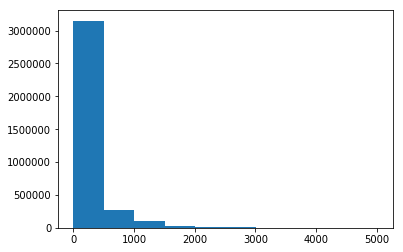

In [25]:
plt.hist(data3['label'])

In [26]:
data3['label'].loc[(data3['label'] < 50)] = 0
data3['label'].loc[(data3['label'] >= 50) & (data3['label'] < 100)] = 1
data3['label'].loc[(data3['label'] >= 100) & (data3['label'] < 200)] = 2
data3['label'].loc[(data3['label'] >= 200) & (data3['label'] < 500)] = 3
data3['label'].loc[(data3['label'] >= 500) & (data3['label'] < 1000)] = 4
data3['label'].loc[(data3['label'] >= 1000) & (data3['label'] < 2000)] = 5
data3['label'].loc[(data3['label'] > 2000)] = 6

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/p

In [27]:
data3

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,profit,label
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001,4.681818,0.0
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001,5.421053,0.0
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001,25.750000,0.0
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001,156.000000,2.0
5,MFR,RDM,"Medford, OR","Bend, OR",11,18,1,156,1990-03-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001,156.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606797,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",292,1311,69,119,2009-06-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701,1.724638,0.0
3606798,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",281,969,51,119,2009-02-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701,2.333333,0.0
3606799,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",245,1026,54,119,2009-11-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701,2.203704,0.0
3606800,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",363,1273,67,119,2009-08-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701,1.776119,0.0


In [28]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3583084 entries, 1 to 3606801
Data columns (total 17 columns):
Origin_airport            object
Destination_airport       object
Origin_city               object
Destination_city          object
Passengers                int64
Seats                     int64
Flights                   int64
Distance                  int64
Fly_date                  object
Origin_population         int64
Destination_population    int64
Org_airport_lat           float64
Org_airport_long          float64
Dest_airport_lat          float64
Dest_airport_long         float64
profit                    float64
label                     float64
dtypes: float64(6), int64(6), object(5)
memory usage: 492.1+ MB


In [29]:
type(data3['Origin_population'])

pandas.core.series.Series

In [30]:
label2 = data3['label'].astype('category')

In [31]:
# Classification Problem

In [32]:
data3.head()

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,profit,label
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001,4.681818,0.0
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001,5.421053,0.0
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001,25.750000,0.0
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001,156.000000,2.0
5,MFR,RDM,"Medford, OR","Bend, OR",11,18,1,156,1990-03-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001,156.000000,2.0


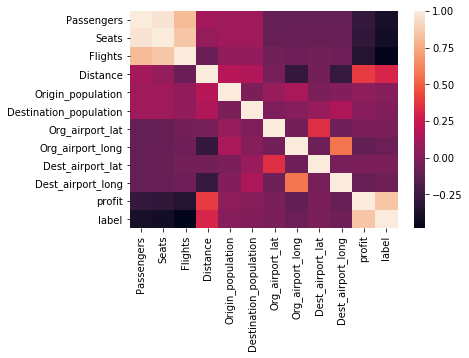

In [33]:
sns.heatmap(data3.corr())

In [34]:
x = data3[['Distance','Origin_population','Destination_population']]
x = x.values
y = data3[['label']]
y = y.values

In [35]:
x.shape

(3583084, 3)

In [36]:
y.shape

(3583084, 1)

In [37]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=10)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
y_pred = clf.predict(X_test)

In [40]:
y_pred

array([1., 0., 0., ..., 2., 0., 0.])

In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6101577130353968


In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
cm

array([[204830,  23789,  24644,  35698,  22408,   8015,      0],
       [  7715,   9055,   2329,   2433,   2042,   3186,   2552],
       [    47,    280,    868,    799,    364,    230,    343],
       [     0,      0,      0,      0,      0,      0,      0],
       [   394,     64,     90,    254,   1810,     23,      0],
       [   740,    320,    283,    339,    303,   2062,      0],
       [     0,      0,      0,      0,      0,      0,      0]])

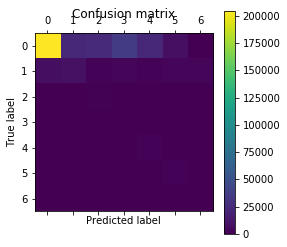

In [43]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()